In [1]:
import fsspec
fs = fsspec.filesystem('gs')
fs.ls('gs://gcp-public-data-arco-era5/co/')

['gcp-public-data-arco-era5/co/model-level-moisture.zarr',
 'gcp-public-data-arco-era5/co/model-level-wind.zarr',
 'gcp-public-data-arco-era5/co/single-level-forecast.zarr',
 'gcp-public-data-arco-era5/co/single-level-reanalysis.zarr',
 'gcp-public-data-arco-era5/co/single-level-surface.zarr']

In [2]:
import xarray as xr

reanalysis = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/co/single-level-reanalysis.zarr', 
    chunks={'time': 48},
    consolidated=True,
)

In [3]:
print(f'size: {reanalysis.nbytes / (1024 ** 4)} TiB')

size: 28.02835009436967 TiB


In [4]:
reanalysis

<xarray.Dataset>
Dimensions:              (time: 374016, values: 542080)
Coordinates:
    depthBelowLandLayer  float64 ...
    entireAtmosphere     float64 ...
    latitude             (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
    longitude            (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
    number               int64 ...
    step                 timedelta64[ns] ...
    surface              float64 ...
  * time                 (time) datetime64[ns] 1979-01-01 ... 2021-08-31T23:0...
    valid_time           (time) datetime64[ns] dask.array<chunksize=(48,), meta=np.ndarray>
Dimensions without coordinates: values
Data variables: (12/38)
    cape                 (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    d2m                  (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    hcc                  (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    istl1                (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    istl2                (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    istl3                (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    ...                   ...
    tsn                  (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    u10                  (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    u100                 (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    v10                  (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    v100                 (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
    z                    (time, values) float32 dask.array<chunksize=(48, 542080), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    GRIB_centre:               ecmf
    GRIB_centreDescription:    European Centre for Medium-Range Weather Forec...
    GRIB_edition:              1
    GRIB_subCentre:            0
    history:                   2022-09-23T18:56 GRIB to CDM+CF via cfgrib-0.9...
    institution:               European Centre for Medium-Range Weather Forec...
    pangeo-forge:inputs_hash:  5f4378143e9f42402424280b63472752da3aa79179b53b...
    pangeo-forge:recipe_hash:  0c3415923e347ce9dac9dc5c6d209525f4d45d799bd25b...
    pangeo-forge:version:      0.9.1

In [6]:
recent_an = reanalysis.sel(time=slice('2020-01-01', '2021-01-01'))
geopotential_t0 = recent_an.z[0, :]
most_recent_ds = recent_an.isel(time=-1)
new_years_ds = recent_an.sel(time='2020-01-01')

In [7]:
def lon_to_360(dlon: float) -> float:
    return ((360 + (dlon % 360)) % 360)

US_ds = recent_an.where(
    (recent_an.longitude > lon_to_360(-171.79)) & (recent_an.latitude > 18.91) &
    (recent_an.longitude < lon_to_360(-66.96)) & (recent_an.latitude < 71.35),
    drop=True
)
US_ds

<xarray.Dataset>
Dimensions:              (time: 8808, values: 49625)
Coordinates:
    depthBelowLandLayer  float64 100.0
    entireAtmosphere     float64 0.0
    latitude             (values) float64 dask.array<chunksize=(49625,), meta=np.ndarray>
    longitude            (values) float64 dask.array<chunksize=(49625,), meta=np.ndarray>
    number               int64 0
    step                 timedelta64[ns] 00:00:00
    surface              float64 0.0
  * time                 (time) datetime64[ns] 2020-01-01 ... 2021-01-01T23:0...
    valid_time           (time) datetime64[ns] dask.array<chunksize=(24,), meta=np.ndarray>
Dimensions without coordinates: values
Data variables: (12/38)
    cape                 (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    d2m                  (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    hcc                  (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    istl1                (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    istl2                (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    istl3                (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    ...                   ...
    tsn                  (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    u10                  (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    u100                 (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    v10                  (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    v100                 (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
    z                    (time, values) float32 dask.array<chunksize=(24, 49625), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    GRIB_centre:               ecmf
    GRIB_centreDescription:    European Centre for Medium-Range Weather Forec...
    GRIB_edition:              1
    GRIB_subCentre:            0
    history:                   2022-09-23T18:56 GRIB to CDM+CF via cfgrib-0.9...
    institution:               European Centre for Medium-Range Weather Forec...
    pangeo-forge:inputs_hash:  5f4378143e9f42402424280b63472752da3aa79179b53b...
    pangeo-forge:recipe_hash:  0c3415923e347ce9dac9dc5c6d209525f4d45d799bd25b...
    pangeo-forge:version:      0.9.1

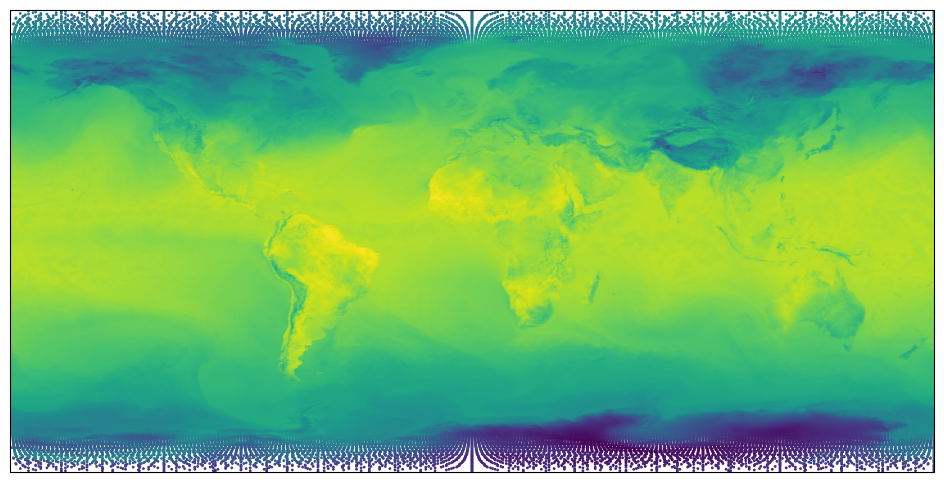

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(12, 6))
plt.axes(projection=ccrs.PlateCarree())
plt.scatter(
    recent_an.longitude,
    recent_an.latitude,
    c=recent_an.t2m.sel(time='2020-10-31T18').values,
    s=1
)